# Goal
This post aims to compare loss functions in deep learning with `PyTorch`.

The following loss functions are covered in this post:
* Mean Absolute Error (L1 Loss)
* Mean Square Error (L2 Loss)
* Binary Cross Entropy (BCE)
* Kullback-Leibler divergence (KL divergence)

**Reference**
* [Medium - A Brief Overview of Loss Functions in Pytorch](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7)
* [PyTorch Documentation - nn.modules.loss](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html)
* [Medium - VISUALIZATION OF SOME LOSS FUNCTIONS FOR DEEP LEARNING WITH TENSORFLOW](https://medium.com/@risingdeveloper/visualization-of-some-loss-functions-for-deep-learning-with-tensorflow-9f60be9d09f9)

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
%matplotlib inline

# Create a data for calculating the loss

In [2]:
x = torch.Tensor(np.linspace(-1, 1, 100))
y = torch.Tensor(np.zeros(100))

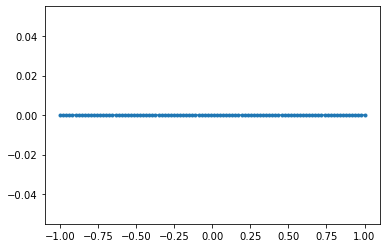

In [3]:
plt.plot(x.numpy(), y.numpy(), '.-');

# Loss Functions

## Mean Absolute Error (L1 Loss) 
$$loss (x, y) = |x - y|$$

In [4]:
criterion = nn.L1Loss()
loss = criterion(x, y)
loss

tensor(0.5051)

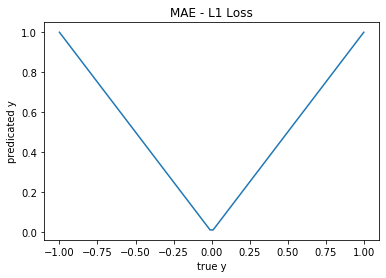

In [5]:
plt.plot(x.numpy(), np.abs(x.numpy()-y.numpy()));
plt.title('MAE - L1 Loss')
plt.xlabel('true y');
plt.ylabel('predicated y');

## Mean Square Error Loss (L2 Loss)
$$loss(x, y) = (x-y)^{2}$$

In [6]:
criterion = nn.MSELoss()
criterion(x, y)

tensor(0.3401)

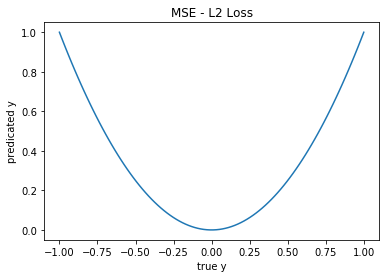

In [7]:
plt.plot(x.numpy(), (x.numpy()-y.numpy())**2);
plt.title('MSE - L2 Loss')
plt.xlabel('true y');
plt.ylabel('predicated y');

## Binary Cross-Entropy Loss 
When $y$ is binary, this is also called **Binary Cross Entropy (BCE)**. 

$$loss(x, y) = - \sum x log y$$

In [47]:
x = torch.Tensor(np.linspace(0.01, .99, 100))
y_label = torch.Tensor(np.ones(100))
y_pred = torch.Tensor(np.linspace(0.01, .6, 100))
m = nn.Sigmoid()

In [52]:
criterion = nn.BCELoss()
criterion(y_pred, y_label)

tensor(1.4531)

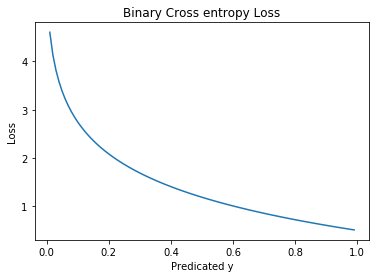

In [49]:
plt.plot(x.numpy(), -np.multiply(y_label.numpy(), np.log(y_pred.numpy())) -np.multiply(1 - y_label.numpy(), np.log(1-y_pred.numpy())));
plt.title('Binary Cross entropy Loss');
plt.xlabel('Predicated y');
plt.ylabel('Loss');

## Kullback-Leibler divergence

$$loss(x, y) = y \cdot (log y - log x) = y \cdot (log \frac{y}{x})$$


In [51]:
criterion = nn.KLDivLoss(reduction='batchmean')
criterion(y_pred, y_label)

tensor(-0.3050)



<div class="alert alert-block alert-info">
<b>Note:</b> To suppress the warning caused by reduction = 'mean', this uses `reduction='batchmean'`. Otherwise, it doesn’t return the true kl divergence value. In the next major release, 'mean' will be changed to be the same as 'batchmean'.
</div>

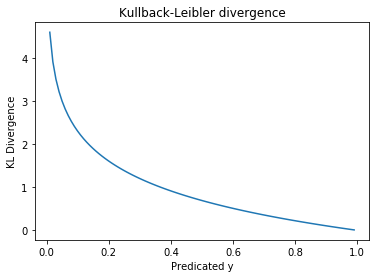

In [50]:
plt.plot(x.numpy(),  y_label.numpy() * np.log(y_label.numpy() / x.numpy()));
plt.title('Kullback-Leibler divergence');
plt.xlabel('Predicated y');
plt.ylabel('KL Divergence');